In [81]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# **Load Data**

In [82]:
def load_data():
# Solver comparison data (Gurobi vs CBC)
    solver_comparison = pd.DataFrame({
        'cities': [10, 20, 30, 40, 50, 70, 100, 200, 500, 750, 1000],
        'gurobi_distance': [6177.496777, 7962.079019, 10320.29223, 11237.46586, 12094.07465,
                           13498.50694, 15655.23204, 22282.29118, 55004.38907, 224696.614, 229537.6679],
        'gurobi_runtime': [1.112483, 39.175006, 601.338432, 602.420976, 603.465666,
                          601.31466, 601.149643, 603.269681, 1266.588248, 1273.714599, 1385.326561],
        'gurobi_gap': [0, 0, 5.66, 6.47, 3.5, 6.15, 6.07, 11.01, 48.7, 84.2, 82.593],
        'cbc_distance': [6177.496777, 7962.079019, 11395.39553, 12381.03035, 14576.90003,
                        17035.33765, 19936.6933, 16535.97713, np.nan, np.nan, np.nan],
        'cbc_runtime': [20.859224, 600.15408, 598.729461, 594.700142, 594.57181,
                       600.973647, 601.515423, 606.279462, np.nan, np.nan, np.nan],
        'cbc_gap': [0, 0, 8.18, 18.97, 41.26, 43.67, 57.16, 60.3, np.nan, np.nan, np.nan]
    })
# OR-Tools + Gurobi warm start data
    warm_start_data = pd.DataFrame({
        'cities': [50, 100, 200, 500, 1000],
        'ortools_distance': [12094.049, 15772.335, 21306.145, 31303.986, 44732.155],
        'ortools_runtime': [9.87885499, 42.78723335, 162.8840983, 600.001179, 600.001945],
        'gurobi_distance': [8838.918, 11738.552, 16535.874, 24524.094, 33888.483],
        'gurobi_runtime': [0.290987968, 0.309859991, 1.400875807, 7.960695028, 100.3865044],
        'improvement_pct': [26.92, 25.58, 22.39, 21.66, 24.24]
    })
 # Clustering heuristic data
    clustering_data = pd.DataFrame({
        'cities': [100, 100, 100, 100, 200, 200, 200, 200, 500, 500, 500, 500],
        'clusters': [5, 10, 15, 20, 5, 10, 15, 20, 5, 10, 15, 20],
        'distance': [39879.21893, 31104.26112, 25859.96329, 24732.7454,
                    69304.80203, 51455.63325, 43286.77369, 39845.31307,
                    169918.6968, 116907.8089, 98601.80289, 83534.71213],
        'runtime': [10.37359214, 0.019636869, 0.026009798, 0.023841381,
                   0.012644529, 0.015167236, 0.020804167, 0.02458334,
                   0.020946026, 0.027354002, 0.030579567, 0.037145615]
    })


    return solver_comparison, warm_start_data, clustering_data

# **Basic Statistics**

In [83]:
# Generate basic statistics for all datasets
def basic_statistics(solver_comparison, warm_start_data, clustering_data):
    print("\n" + "="*60)
    print("BASIC STATISTICS")
    print("="*60)
# Solver comparison stats
    print("\nSOLVER COMPARISON STATISTICS:")
    print("-" * 40)
# Calculate performance difference
    solver_comparison['distance_diff_pct'] = (
        (solver_comparison['cbc_distance'] - solver_comparison['gurobi_distance']) /
        solver_comparison['gurobi_distance'] * 100
    ).where(solver_comparison['cbc_distance'].notna(), np.nan)

    print(f"Average Gurobi distance: {solver_comparison['gurobi_distance'].mean():.0f}")
    print(f"Average CBC distance: {solver_comparison['cbc_distance'].mean():.0f}")
    print(f"Average performance difference: {solver_comparison['distance_diff_pct'].mean():.1f}%")
    print(f"Max performance difference: {solver_comparison['distance_diff_pct'].max():.1f}%")
# Warm start statistics
    print("\nWARM START STATISTICS:")
    print("-" * 40)
    print(f"Average improvement: {warm_start_data['improvement_pct'].mean():.1f}%")
    print(f"Best improvement: {warm_start_data['improvement_pct'].max():.1f}%")
    print(f"Runtime speedup (average): {(warm_start_data['ortools_runtime'] / warm_start_data['gurobi_runtime']).mean():.0f}x")
# Clustering statistics
    print("\nCLUSTERING STATISTICS:")
    print("-" * 40)
    avg_runtime = clustering_data['runtime'].mean()
    print(f"Average clustering runtime: {avg_runtime:.3f}s")
    print(f"Fastest solution: {clustering_data['runtime'].min():.3f}s")
    print(f"All solutions under: {clustering_data['runtime'].max():.3f}s")

# **Create Visualizations**

In [84]:
# Create visualizations
def create_visualizations(solver_comparison, warm_start_data, clustering_data):
    print("\n" + "="*60)
    print("CREATING VISUALIZATIONS")
    print("="*60)
# Set up the plotting area
    fig = plt.figure(figsize=(15, 10))
# 1. Solver Comparison - Distance
    plt.subplot(2, 2, 1)
    plt.plot(solver_comparison['cities'], solver_comparison['gurobi_distance'],
             'o-', label='Gurobi', linewidth=2, markersize=8)
    plt.plot(solver_comparison['cities'], solver_comparison['cbc_distance'],
             's-', label='CBC', linewidth=2, markersize=8)
    plt.xlabel('Number of Cities')
    plt.ylabel('Distance')
    plt.title('Solution Quality: Gurobi vs CBC')
    plt.legend()
    plt.grid(True, alpha=0.3)

# 2. Warm Start Comparison - Distance
    plt.subplot(2, 2, 2)
    plt.plot(warm_start_data['cities'], warm_start_data['ortools_distance'],
             'o-', label='OR-Tools', linewidth=2, markersize=8)
    plt.plot(warm_start_data['cities'], warm_start_data['gurobi_distance'],
             's-', label='Gurobi (Warm Start)', linewidth=2, markersize=8)
    plt.xlabel('Number of Cities')
    plt.ylabel('Distance')
    plt.title('Warm Start Strategy Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)

# 3. Runtime Speedup (Log Scale)
    plt.subplot(2, 2, 3)
    speedup = warm_start_data['ortools_runtime'] / warm_start_data['gurobi_runtime']
    plt.semilogy(warm_start_data['cities'], speedup, 'o-', linewidth=2, markersize=8, color='purple')
    plt.xlabel('Number of Cities')
    plt.ylabel('Speedup Factor (log scale)')
    plt.title('Runtime Speedup with Warm Start')
    plt.grid(True, alpha=0.3)

# 4. Clustering Analysis - All Sizes
    plt.subplot(2, 2, 4)
    for city_count in [100, 200, 500]:
        data = clustering_data[clustering_data['cities'] == city_count]
        plt.plot(data['clusters'], data['distance'], 'o-',
                 label=f'{city_count} cities', linewidth=2, markersize=6)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distance')
    plt.title('Clustering Performance by Problem Size')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("Visualizations created!")

# **Analysis with insights **

In [85]:

def advanced_analysis(solver_comparison, warm_start_data, clustering_data):
    print("\n" + "="*60)
    print("ADVANCED ANALYSIS & INSIGHTS")
    print("="*60)
# Clustering Optimization Analysis
    print("\nCLUSTERING OPTIMIZATION:")
    print("-" * 30)

    for city_count in [100, 200, 500]:
        data = clustering_data[clustering_data['cities'] == city_count]
        best_clusters = data.loc[data['distance'].idxmin(), 'clusters']
        best_distance = data['distance'].min()
        worst_distance = data['distance'].max()
        improvement = (worst_distance - best_distance) / worst_distance * 100

        print(f"{city_count} cities: Best={best_clusters} clusters, Improvement={improvement:.1f}%")
# Recommendation
    print("\nAUTOMATED RECOMMENDATIONS:")
    print("-" * 30)

    def get_recommendation(num_cities):
        if num_cities <= 50:
            return "Use pure Gurobi for optimal solutions"
        elif num_cities <= 500:
            return "Use OR-Tools warm start + Gurobi refinement"
        else:
            return "Consider clustering heuristic for speed or warm start for quality"

    test_sizes = [25, 100, 250, 750, 1500]
    for size in test_sizes:
        print(f"{size:4d} cities: {get_recommendation(size)}")

STARTING COMPLETE TSP ANALYSIS

BASIC STATISTICS

SOLVER COMPARISON STATISTICS:
----------------------------------------
Average Gurobi distance: 55315
Average CBC distance: 13250
Average performance difference: 8.6%
Max performance difference: 27.3%

WARM START STATISTICS:
----------------------------------------
Average improvement: 24.2%
Best improvement: 26.9%
Runtime speedup (average): 74x

CLUSTERING STATISTICS:
----------------------------------------
Average clustering runtime: 0.886s
Fastest solution: 0.013s
All solutions under: 10.374s

CREATING VISUALIZATIONS


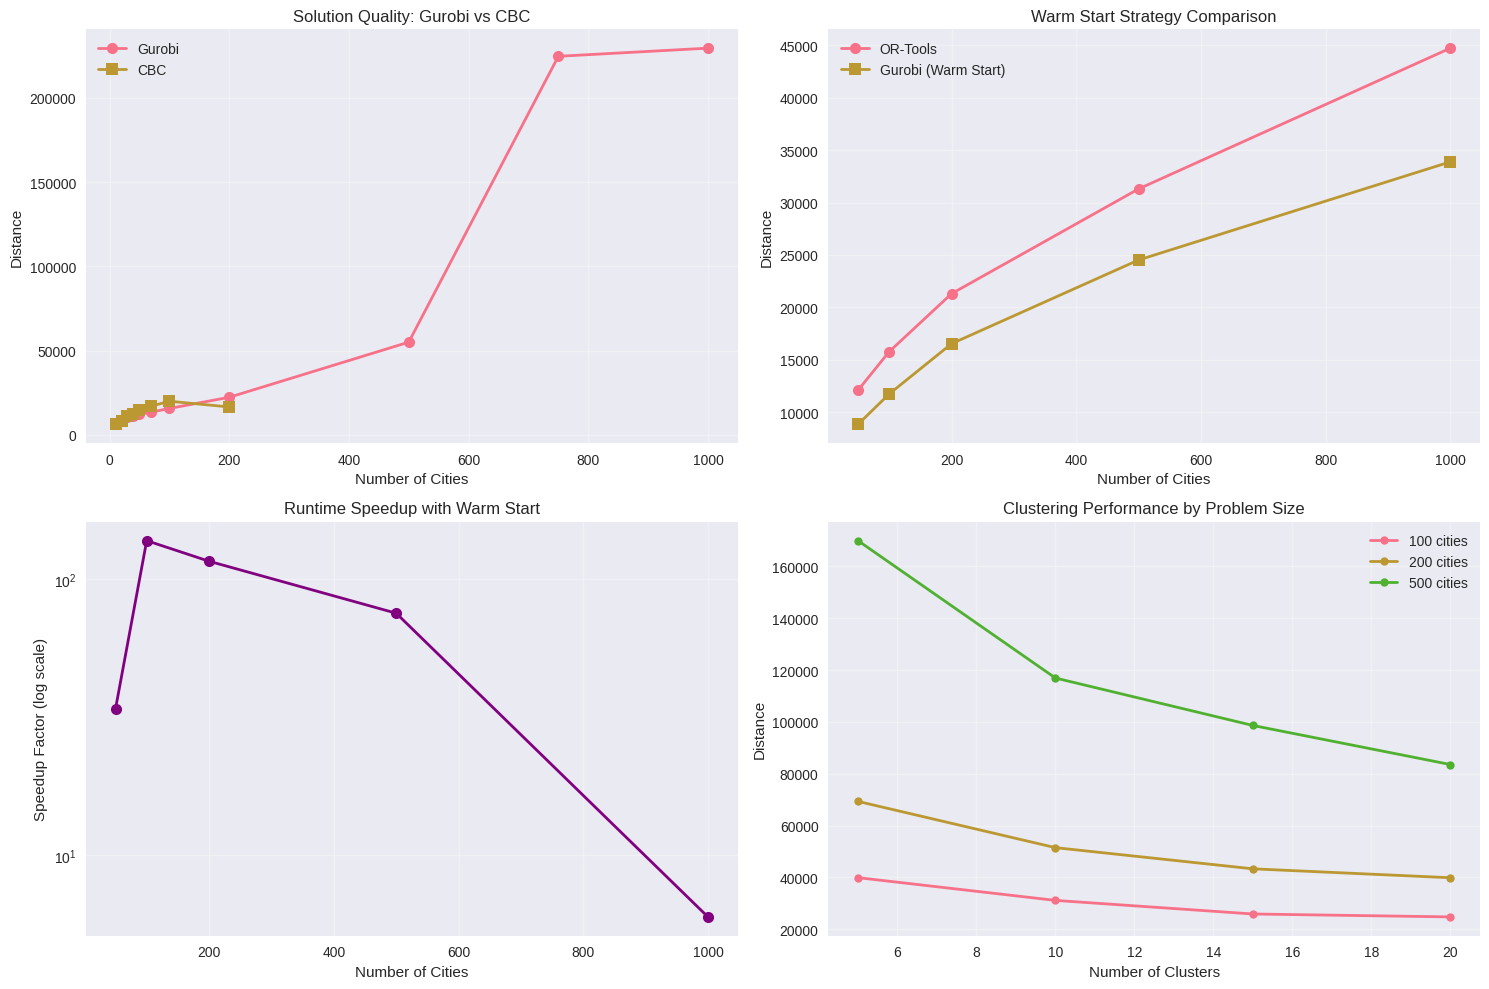

Visualizations created!

ADVANCED ANALYSIS & INSIGHTS

CLUSTERING OPTIMIZATION:
------------------------------
100 cities: Best=20 clusters, Improvement=38.0%
200 cities: Best=20 clusters, Improvement=42.5%
500 cities: Best=20 clusters, Improvement=50.8%

AUTOMATED RECOMMENDATIONS:
------------------------------
  25 cities: Use pure Gurobi for optimal solutions
 100 cities: Use OR-Tools warm start + Gurobi refinement
 250 cities: Use OR-Tools warm start + Gurobi refinement
 750 cities: Consider clustering heuristic for speed or warm start for quality
1500 cities: Consider clustering heuristic for speed or warm start for quality


In [86]:
# Run the complete analysis
def run_complete_analysis():
    print("STARTING COMPLETE TSP ANALYSIS")
# Load data
    solver_comparison, warm_start_data, clustering_data = load_data()
#Run Analysis
    basic_statistics(solver_comparison, warm_start_data, clustering_data)
    create_visualizations(solver_comparison, warm_start_data, clustering_data)
    advanced_analysis(solver_comparison, warm_start_data, clustering_data)

run_complete_analysis()